In [1]:
#from urllib.request import urlopen
import spacy
from spacy.cli import link
from spacy.util import get_package_path
from gensim.models import LsiModel

model_name = "de_core_news_sm"
package_path = get_package_path(model_name)
link(model_name, model_name, force=True, model_path=package_path)
nlp = spacy.load("de_core_news_sm")

import os.path
from gensim import corpora
from gensim.models import LsiModel
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
import pandas as pd
import gensim
from gensim import corpora, models
from pprint import pprint
import char_split

✔ Linking successful
c:\users\thomas.zoellinger\appdata\local\programs\python\python37\lib\site-packages\de_core_news_sm
-->
c:\users\thomas.zoellinger\appdata\local\programs\python\python37\lib\site-packages\spacy\data\de_core_news_sm
You can now load the model via spacy.load('de_core_news_sm')


In [309]:
newdf= pd.read_csv(r"C:\Users\Thomas.Zoellinger\Downloads\Test.csv",sep="@",encoding="UTF-16")
newdf.drop_duplicates()

,Unnamed: 0,Headline,Hauptartikel,Link,date,case,col3,Location,Location2,Beschreibung
0,0,Drogen in der Chips-Packung,Zivilfahnder der Autobahnpolizei haben am ges...,https://www.presseportal.de/blaulicht/pm/4970/...,2018-11-26,1158,15,Frankfurt-Bundesautobahn 3,NaN,Frankfurt (ots) - (mc)
1,1,Mülltonnen in Brand,Gestern (25.11.2018) brannten in einer Straße...,https://www.presseportal.de/blaulicht/pm/4970/...,2018-11-26,1157,15,Frankfurt-Niederursel,NaN,Frankfurt (ots) - (em)
2,2,Kind nach Sturz aus Fenster verstorben,Gestern Abend stürzte ein 3-jähriges Kind aus...,https://www.presseportal.de/blaulicht/pm/4970/...,2018-11-26,1156,15,Frankfurt-Gallus,NaN,Frankfurt (ots) - (ka)
3,3,Mülltonnen entzündet,Bislang unbekannte Täter entzündeten am Sonnt...,https://www.presseportal.de/blaulicht/pm/4970/...,2018-11-25,1155,15,Frankfurt-Niederursel,NaN,Frankfurt (ots) - (fue)
4,4,Zeugen melden Schüsse,Über den Polizeinotruf meldeten mehrere Zeuge...,https://www.presseportal.de/blaulicht/pm/4970/...,2018-11-25,1154,15,Frankfurt-Niederursel,NaN,Frankfurt (ots) - (fue)
5,5,78-Jährigem die Tasche entwendet,Ein 78-jähriger Frankfurter befand sich am Sa...,https://www.presseportal.de/blaulicht/pm/4970/...,2018-11-25,1153,15,Frankfurt-Innenstadt,NaN,Frankfurt (ots) - (fue)
6,6,Ins Gesicht geschlagen,"Ein 68-jähriger Frankfurter ging am Freitag, ...",https://www.presseportal.de/blaulicht/pm/4970/...,2018-11-25,1152,15,Frankfurt-Innenstadt,NaN,Frankfurt (ots) - (fue)
7,7,Handtaschenraub,"Eine 75-jährige Frankfurterin war am Freitag,...",https://www.presseportal.de/blaulicht/pm/4970/...,2018-11-25,1151,15,Frankfurt-Westend,NaN,Frankfurt (ots) - (fue)
8,8,Festnahme nach Ladendiebstahl,"Am Samstag, den 24. November 2018, gegen 15.2...",https://www.presseportal.de/blaulicht/pm/4970/...,2018-11-25,1150,15,Frankfurt-Bornheim,NaN,Frankfurt (ots) - (fue)
9,9,Bilanz der Frankfurter Polizei nach Europa Lea...,Nach dem gestrigen Europa League Spiel zwisch...,https://www.presseportal.de/blaulicht/pm/4970/...,2018-11-30,1170,15,Frankfurt,NaN,Frankfurt (ots) - (ka)


In [310]:
newdf["Clean_Hauptartikel"] = newdf['Hauptartikel'].str.replace('[^\w\s]','')

In [311]:
def getLemma(column):
    doc = nlp(text=column)
    CleanWordList=[]
    for token in doc:
        CleanWordList.append(token.lemma_)
    CleanWord = " ".join(CleanWordList)
    return CleanWord


In [312]:
stop = open(r"C:\Users\Thomas.Zoellinger\Downloads\Stopwords1.txt", "r")
stop.close()
stop = open(r"C:\Users\Thomas.Zoellinger\Downloads\Stopwords1.txt", "r")
stop = list(stop)
stop = list(map(lambda s: s.strip(),stop))

In [313]:
def getElement(Liste):
    return ' '.join(Liste)

In [314]:
newdf["Headline"].str.replace('\d+', '')

0                            Drogen in der Chips-Packung
1                                    Mülltonnen in Brand
2                 Kind nach Sturz aus Fenster verstorben
3                                   Mülltonnen entzündet
4                                  Zeugen melden Schüsse
5                         -Jährigem die Tasche entwendet
6                                 Ins Gesicht geschlagen
7                                        Handtaschenraub
8                          Festnahme nach Ladendiebstahl
9      Bilanz der Frankfurter Polizei nach Europa Lea...
10     Eckenheim: Nachtrag zur Meldung Nummer   - : R...
11                            Altreifen illegal entsorgt
12                              Tödlicher Verkehrsunfall
13                 Erfolgreiche Maßnahme der AG Siedlung
14                         Autos nach Unfall ausgebrannt
15                          Junger Mann fällt vor U-Bahn
16     Kontrollaktion mit anschließender Sicherstellu...
17     Start des Pilotprojekts 

In [315]:
def getCleanColumn(Column):
    Column = Column.apply(getLemma)
    Column = pd.Series(Column)
    Column = Column.str.replace('[^\w\s]','')
    Column = Column.str.lower()
    Column = Column.apply(lambda x: [item for item in x.split() if item not in stop])
    Column = pd.Series(Column)
    Column = Column.apply(getElement)
    Column = Column.str.replace('\d+', '')
    Column = Column.apply(lambda x: [item for item in x.split() if item not in stop])
    Column = Column.apply(getElement)
    Column = pd.DataFrame(Column)
    return Column

In [316]:
Lemmas = newdf["Clean_Hauptartikel"].apply(getLemma)
Lemmas = pd.DataFrame(Lemmas)
Lemmas["Clean_Hauptartikel"]= Lemmas["Clean_Hauptartikel"].str.lower()
Lemmas["Clean_Hauptartikel"].head()

0      zivilfahnder der autobahnpolizei haben am ge...
1      gestern 25112018 brennen in einer straße in ...
2      gestern abend stürzen einen 3jähriges kind a...
3      bislang unbekannt täter entzünden am sonntag...
4      über der polizeinotruf melden mehrer zeuge a...
Name: Clean_Hauptartikel, dtype: object

In [317]:
Lemmas = Lemmas["Clean_Hauptartikel"].apply(lambda x: [item for item in x.split() if item not in stop])
Lemmas = pd.DataFrame(Lemmas)
Lemmas.head()

,Clean_Hauptartikel
0,"[zivilfahnder, 25, 2018, parken, ride, parkpla..."
1,"[25112018, brennen, straße, niederursel, müllt..."
2,"[stürzen, 3jähriges, kind, fenster, mehrfamili..."
3,"[unbekannt, täter, entzünden, 25, 2018, 0600, ..."
4,"[polizeinotruf, melden, 24, 2018, 1420, schuß,..."


In [318]:
Lemmas['liststring'] = [' '.join(map(str, l)) for l in Lemmas['Clean_Hauptartikel']]
Lemmas["liststring"] = Lemmas["liststring"].str.replace('\d+', '')
Lemmas['liststring'] = Lemmas['liststring'].apply(lambda x: [item for item in x.split() if item not in stop])
Lemmas.head()

,Clean_Hauptartikel,liststring
0,"[zivilfahnder, 25, 2018, parken, ride, parkpla...","[zivilfahnder, parken, ride, parkplatz, stadtw..."
1,"[25112018, brennen, straße, niederursel, müllt...","[brennen, straße, niederursel, mülltonnen, ver..."
2,"[stürzen, 3jähriges, kind, fenster, mehrfamili...","[stürzen, kind, fenster, mehrfamilienhauses, l..."
3,"[unbekannt, täter, entzünden, 25, 2018, 0600, ...","[unbekannt, täter, entzünden, mülltonnen, hand..."
4,"[polizeinotruf, melden, 24, 2018, 1420, schuß,...","[polizeinotruf, melden, schuß, gerharthauptman..."


In [319]:
newdf["Clean_Hauptartikel"] = Lemmas['liststring']
Lemmas['liststring']

0      [zivilfahnder, parken, ride, parkplatz, stadtw...
1      [brennen, straße, niederursel, mülltonnen, ver...
2      [stürzen, kind, fenster, mehrfamilienhauses, l...
3      [unbekannt, täter, entzünden, mülltonnen, hand...
4      [polizeinotruf, melden, schuß, gerharthauptman...
5      [befinden, fußen, unterwegs, zeil, gehbehinder...
6      [fußen, grünanlage, friedberger, anlage, höhe,...
7      [fußen, bockenheimer, anlage, unterwegs, näher...
8      [befinden, streifen, polizeirevieres, höhenstr...
9      [europa, league, eintracht, olympique, marseil...
10     [presse, betreten, unbekannt, täter, lebensmit...
11     [monat, illegal, altreifenablagerungen, nördli...
12     [altern, pkw, verunglücken, versterben, befahr...
13     [kraft, kontrolle, platensieldung, durchführen...
14     [stoßen, höhe, nordwestkreuzes, auto, anschlie...
15     [ubahnhaltestelle, eschenheimer, tor, schwer, ...
16     [kontrollaktion, führen, sicherstellung, unter...
17     [sinken, zahl, unfall, j

In [359]:
dataset = (newdf["allWords"])

# be sure to split sentence before feed into Dictionary
#dataset = [d.split() for d in dataset]

vocab = gensim.corpora.Dictionary(dataset)
bow_corpus = [vocab.doc2bow(doc) for doc in dataset]
bow_doc_50 = bow_corpus[50]
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

In [365]:
#Running LDA using TF-IDF
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=4, id2word=vocab, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(7):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.001*"brand" + 0.001*"fahrzeug" + 0.001*"auto" + 0.001*"unbekannt" + 0.001*"flüchten" + 0.001*"fahrrad" + 0.001*"dieb" + 0.001*"wohnung" + 0.001*"kontrolle" + 0.001*"marihuana"
Topic: 1 Word: 0.002*"täter" + 0.001*"fahrrad" + 0.001*"auto" + 0.001*"dieb" + 0.001*"straße" + 0.001*"brand" + 0.001*"befinden" + 0.001*"unfall" + 0.001*"euro" + 0.001*"fahrzeug"
Topic: 2 Word: 0.001*"schwer" + 0.001*"täter" + 0.001*"verletzen" + 0.001*"dieb" + 0.001*"fahrzeug" + 0.001*"euro" + 0.001*"festnehmen" + 0.001*"wohnung" + 0.001*"krankenhaus" + 0.001*"person"
Topic: 3 Word: 0.003*"autobahnkreuz" + 0.003*"bundesautobahn" + 0.002*"richtung" + 0.002*"dreieck" + 0.001*"geschwindigkeitsmessungen" + 0.001*"fahrzeug" + 0.001*"ubahn" + 0.001*"straße" + 0.001*"unfall" + 0.001*"stehen"


In [323]:
def getTopics(lda_model_tfidf,bow_corpus):
    TopicList=[]
    for i in range(0, len(lda_model_tfidf.get_document_topics(bow_corpus))):
        TopicList.append(max(lda_model_tfidf.get_document_topics(bow_corpus[i]), key = lambda x : x[1]))
    return TopicList
TopicList = getTopics(lda_model_tfidf,bow_corpus)

In [324]:
TopicList = pd.DataFrame(TopicList)
newdf["TopicNumber"]= TopicList.iloc[:,0]
newdf["TopicProb"]= TopicList.iloc[:,1]
newdf["CleanHeadline"]= getCleanColumn(newdf["Headline"])
newdf.head()

,Unnamed: 0,Headline,Hauptartikel,Link,date,case,col3,Location,Location2,Beschreibung,Clean_Hauptartikel,TopicNumber,TopicProb,CleanHeadline
0,0,Drogen in der Chips-Packung,Zivilfahnder der Autobahnpolizei haben am ges...,https://www.presseportal.de/blaulicht/pm/4970/...,2018-11-26,1158,15,Frankfurt-Bundesautobahn 3,NaN,Frankfurt (ots) - (mc),"[zivilfahnder, parken, ride, parkplatz, stadtw...",3,0.960961,droge chipspackung
1,1,Mülltonnen in Brand,Gestern (25.11.2018) brannten in einer Straße...,https://www.presseportal.de/blaulicht/pm/4970/...,2018-11-26,1157,15,Frankfurt-Niederursel,NaN,Frankfurt (ots) - (em),"[brennen, straße, niederursel, mülltonnen, ver...",3,0.831719,mülltonnen brand
2,2,Kind nach Sturz aus Fenster verstorben,Gestern Abend stürzte ein 3-jähriges Kind aus...,https://www.presseportal.de/blaulicht/pm/4970/...,2018-11-26,1156,15,Frankfurt-Gallus,NaN,Frankfurt (ots) - (ka),"[stürzen, kind, fenster, mehrfamilienhauses, l...",5,0.962620,kind sturz fenster versterben
3,3,Mülltonnen entzündet,Bislang unbekannte Täter entzündeten am Sonnt...,https://www.presseportal.de/blaulicht/pm/4970/...,2018-11-25,1155,15,Frankfurt-Niederursel,NaN,Frankfurt (ots) - (fue),"[unbekannt, täter, entzünden, mülltonnen, hand...",3,0.952237,mülltonnen entzünden
4,4,Zeugen melden Schüsse,Über den Polizeinotruf meldeten mehrere Zeuge...,https://www.presseportal.de/blaulicht/pm/4970/...,2018-11-25,1154,15,Frankfurt-Niederursel,NaN,Frankfurt (ots) - (fue),"[polizeinotruf, melden, schuß, gerharthauptman...",5,0.958967,melden schuß


In [325]:
def split_words(column):
    DataFrame = column.str.split(' ', expand=True).rename(columns=lambda x: f"string_{x+1}")
    for col in DataFrame.columns:
        column = DataFrame[col]
        column.fillna(value="", inplace= True)
        NewColumn = column.apply(char_split.split_compound)
        NewColumn = [item[0] for item in NewColumn]
        NewColumn = pd.DataFrame(NewColumn)
        NewColumn.columns = ["Confidence", "Word1","Word2"]
        Keep = NewColumn["Confidence"]<=0
        NewColumn[Keep] =" "
        NewColumn["Combine"] = NewColumn["Word1"]+" " + NewColumn["Word2"]
        #NewColumn["Combine"] = NewColumn["Combine"].str.lower()
        DataFrame[col]=NewColumn["Combine"]
    DataFrame['All_Combined'] = DataFrame.apply(' '.join, axis=1)
    DataFrame["All_Combined"]= getCleanColumn(DataFrame["All_Combined"])
    DataFrame["All_Combined"] = DataFrame["All_Combined"].str.lower()
    return DataFrame["All_Combined"]

In [326]:
newdf["sepHeadline"] = split_words(newdf['CleanHeadline'])
newdf["Clean_Hauptartikel"] =newdf["Clean_Hauptartikel"].apply(getElement)
newdf["sepHeadline"]

0                                           chip packung
1                                             müll tonne
2                                       fen ster sterben
3                                             müll tonne
4                                                    mel
5                                                  wende
6                                                 liegen
7                                                       
8                                         lade diebstahl
9                                                lea gue
10                                    lebensmittel markt
11                                  reife ille gal sorge
12                                        verkehr unfall
13                                        erfolgen reich
14                                           ausb rennen
15                                                      
16                        kontroll aktion stellung beach
17     pilot projekt gefahr sen

In [357]:
newdf["allWords"]= newdf["sepHeadline"]+" "+ newdf["Clean_Hauptartikel"]+" " + newdf["CleanHeadline"]
newdf["allWords"] = newdf["allWords"].apply(lambda x: [item for item in x.split()])

In [329]:
def prepare_corpus(doc_clean):
    # Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
    dictionary = corpora.Dictionary(doc_clean)
    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    # generate LDA model
    return dictionary,doc_term_matrix

In [330]:
def create_gensim_lsa_model(doc_clean,number_of_topics,words):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    # generate LSA model
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel

In [332]:
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    """
    Input   : dictionary : Gensim dictionary
              corpus : Gensim corpus
              texts : List of input texts
              stop : Max num of topics
    purpose : Compute c_v coherence for various number of topics
    Output  : model_list : List of LSA topic models
              coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics=num_topics, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [333]:
def plot_graph(doc_clean,start, stop, step):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,
                                                            stop, start, step)
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

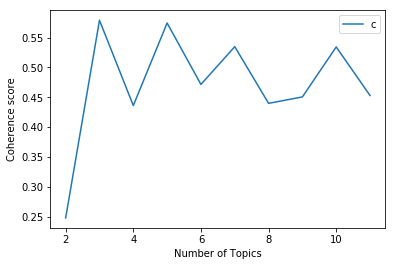

In [334]:
start,stop,step=2,12,1
plot_graph(newdf["allWords"],start,stop,step)

In [366]:
Model = create_gensim_lsa_model(newdf["allWords"],5,60)
for idx, topic in Model.print_topics(num_words=25):
    print('Topic: {} \nWords: {}'.format(idx, topic))


[(0, '0.549*"bundesautobahn" + 0.539*"autobahnkreuz" + 0.391*"richtung" + 0.296*"dreieck" + 0.215*"geschwindigkeitsmessungen" + 0.185*"anschlussstelle" + 0.173*"bundesstraße" + 0.084*"stehen" + 0.074*"durchführen" + 0.073*"örtlichkeit" + 0.072*"kommend" + 0.072*"geschwindigkeits" + 0.072*"messung" + 0.072*"messgeräte" + 0.063*"homburg" + 0.053*"straße" + 0.030*"fahrzeug" + 0.028*"züricher" + 0.028*"unfall" + 0.026*"täter" + 0.022*"verletzen" + 0.019*"fahren" + 0.017*"unterwegs" + 0.017*"fahrer" + 0.016*"euro" + 0.016*"auto" + 0.016*"schwer" + 0.016*"unbekannt" + 0.013*"krankenhaus" + 0.012*"dauern" + 0.012*"höhe" + 0.012*"flüchten" + 0.012*"fahrrad" + 0.011*"dieb" + 0.011*"festnehmen" + 0.011*"mercedes" + 0.011*"groß" + 0.011*"verkehrsunfall" + 0.010*"person" + 0.010*"versuchen" + 0.010*"sperren" + 0.010*"verletzung" + 0.009*"landstrae" + 0.009*"beschädigen" + 0.008*"pkw" + 0.008*"dunkel" + 0.008*"maßnahme" + 0.008*"befinden" + 0.008*"verkehr" + 0.008*"ubahn" + 0.008*"gegenstand" + 0.0

Words: 0.336*"weihnachtsmarkt" + 0.209*"themenabonnement" + -0.199*"gramm" + 0.193*"thema" + 0.192*"straße" + 0.178*"app" + 0.174*"altstadtfest" + -0.161*"droge" + 0.157*"sicherheitsrelevant" + -0.149*"marihuana" + -0.143*"festnehmen" + 0.127*"besucher" + 0.126*"jederzeit" + 0.122*"demonstration" + 0.118*"kostenlos" + -0.115*"maßnahme" + -0.115*"kontrolle" + 0.113*"link" + 0.111*"empfangen" + 0.104*"qrcode" + 0.104*"warn" + 0.104*"katwarn" + 0.104*"abmeldung" + 0.099*"versammlung" + 0.097*"täter"


In [352]:
vocab = gensim.corpora.Dictionary(newdf["allWords"])
bow_corpus = [vocab.doc2bow(doc) for doc in dataset]
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

In [353]:
def getMyTopic(row):
    bow = dictionary.doc2bow(row)
    Topic = max((Model[bow]), key= lambda x: x[1])
    return Topic[0]

def getMyTopic1(row):
    bow = dictionary.doc2bow(row)
    Topic = max((Model[bow]), key= lambda x: x[1])
    return Topic[1]

In [354]:
newdf["Topic"] = newdf["allWords"].apply(getMyTopic)
newdf["Prob"] = newdf["allWords"].apply(getMyTopic1)

In [355]:
newdf

,Unnamed: 0,Headline,Hauptartikel,Link,date,case,col3,Location,Location2,Beschreibung,Clean_Hauptartikel,TopicNumber,TopicProb,CleanHeadline,sepHeadline,allWords,Topic,Prob
0,0,Drogen in der Chips-Packung,Zivilfahnder der Autobahnpolizei haben am ges...,https://www.presseportal.de/blaulicht/pm/4970/...,2018-11-26,1158,15,Frankfurt-Bundesautobahn 3,NaN,Frankfurt (ots) - (mc),zivilfahnder parken ride parkplatz stadtwald ö...,3,0.960961,droge chipspackung,chip packung,"[chip, packung, zivilfahnder, parken, ride, pa...",2,0.242966
1,1,Mülltonnen in Brand,Gestern (25.11.2018) brannten in einer Straße...,https://www.presseportal.de/blaulicht/pm/4970/...,2018-11-26,1157,15,Frankfurt-Niederursel,NaN,Frankfurt (ots) - (em),brennen straße niederursel mülltonnen verletze...,3,0.831719,mülltonnen brand,müll tonne,"[müll, tonne, brennen, straße, niederursel, mü...",4,0.297061
2,2,Kind nach Sturz aus Fenster verstorben,Gestern Abend stürzte ein 3-jähriges Kind aus...,https://www.presseportal.de/blaulicht/pm/4970/...,2018-11-26,1156,15,Frankfurt-Gallus,NaN,Frankfurt (ots) - (ka),stürzen kind fenster mehrfamilienhauses ludwig...,5,0.962620,kind sturz fenster versterben,fen ster sterben,"[fen, ster, sterben, stürzen, kind, fenster, m...",5,0.735766
3,3,Mülltonnen entzündet,Bislang unbekannte Täter entzündeten am Sonnt...,https://www.presseportal.de/blaulicht/pm/4970/...,2018-11-25,1155,15,Frankfurt-Niederursel,NaN,Frankfurt (ots) - (fue),unbekannt täter entzünden mülltonnen handeln p...,3,0.952237,mülltonnen entzünden,müll tonne,"[müll, tonne, unbekannt, täter, entzünden, mül...",2,0.536293
4,4,Zeugen melden Schüsse,Über den Polizeinotruf meldeten mehrere Zeuge...,https://www.presseportal.de/blaulicht/pm/4970/...,2018-11-25,1154,15,Frankfurt-Niederursel,NaN,Frankfurt (ots) - (fue),polizeinotruf melden schuß gerharthauptmannrin...,5,0.958967,melden schuß,mel,"[mel, polizeinotruf, melden, schuß, gerharthau...",0,0.224480
5,5,78-Jährigem die Tasche entwendet,Ein 78-jähriger Frankfurter befand sich am Sa...,https://www.presseportal.de/blaulicht/pm/4970/...,2018-11-25,1153,15,Frankfurt-Innenstadt,NaN,Frankfurt (ots) - (fue),befinden fußen unterwegs zeil gehbehindert beu...,4,0.795090,tasche entwenden,wende,"[wende, befinden, fußen, unterwegs, zeil, gehb...",2,0.327199
6,6,Ins Gesicht geschlagen,"Ein 68-jähriger Frankfurter ging am Freitag, ...",https://www.presseportal.de/blaulicht/pm/4970/...,2018-11-25,1152,15,Frankfurt-Innenstadt,NaN,Frankfurt (ots) - (fue),fußen grünanlage friedberger anlage höhe seile...,0,0.512798,gesicht schlagen,liegen,"[liegen, fußen, grünanlage, friedberger, anlag...",3,0.696047
7,7,Handtaschenraub,"Eine 75-jährige Frankfurterin war am Freitag,...",https://www.presseportal.de/blaulicht/pm/4970/...,2018-11-25,1151,15,Frankfurt-Westend,NaN,Frankfurt (ots) - (fue),fußen bockenheimer anlage unterwegs nähern unb...,5,0.725199,handtaschenraub,,"[fußen, bockenheimer, anlage, unterwegs, näher...",0,0.523560
8,8,Festnahme nach Ladendiebstahl,"Am Samstag, den 24. November 2018, gegen 15.2...",https://www.presseportal.de/blaulicht/pm/4970/...,2018-11-25,1150,15,Frankfurt-Bornheim,NaN,Frankfurt (ots) - (fue),befinden streifen polizeirevieres höhenstraße ...,5,0.974691,festnahme ladendiebstahl,lade diebstahl,"[lade, diebstahl, befinden, streifen, polizeir...",6,0.158908
9,9,Bilanz der Frankfurter Polizei nach Europa Lea...,Nach dem gestrigen Europa League Spiel zwisch...,https://www.presseportal.de/blaulicht/pm/4970/...,2018-11-30,1170,15,Frankfurt,NaN,Frankfurt (ots) - (ka),europa league eintracht olympique marseille po...,1,0.795554,bilanz europa league,lea gue,"[lea, gue, europa, league, eintracht, olympiqu...",4,0.683882


In [356]:
#Safe as Excel
newdf.to_excel(r"C:\Users\Thomas.Zoellinger\Downloads\MYDF.xlsx")